    Начитавшись моих отднокашников в чате, решил попробовать совсем другой подход. сделать SVD разложение - тогда мы не боимся Nan и большое количество признаков тоже не проблема.
    То есть теперь нам важно наоборот не терять NaN, особенно при переходе в dummy-переменные. Еще момент - так как прогнозы считаем по Nan можно сразу объединить оба датасета

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('course_project_train.csv', sep=',', encoding='utf-8', decimal='.')

In [3]:
df2 = pd.read_csv('course_project_test.csv', sep=',', encoding='utf-8', decimal='.')

In [4]:
df = pd.concat([df, df2])

In [5]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7.930000e+03,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.00000,4561.000000,9983.000000,1.000000e+04,1.000000e+04,10000.000000,7930.000000,7500.000000
mean,1.366525e+06,0.031400,11.14430,18.319580,8.865079e+05,0.16800,34.564569,0.114595,1.194381e+07,2.914741e+05,18303.675600,1171.992182,0.281733
std,8.638276e+05,0.304341,4.89476,7.095357,1.389982e+07,0.51459,21.771990,0.349729,3.200878e+07,3.339979e+05,11831.647516,1639.812951,0.449874
min,1.065330e+05,0.000000,1.00000,3.900000,0.000000e+00,0.00000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.459892e+05,0.000000,8.00000,13.500000,2.788115e+05,0.00000,16.000000,0.000000,1.805485e+05,1.132258e+05,10059.750000,711.000000,0.000000
50%,1.168814e+06,0.000000,10.00000,17.000000,4.781810e+05,0.00000,32.000000,0.000000,3.117180e+05,2.090190e+05,16200.000000,731.000000,0.000000
75%,1.638693e+06,0.000000,14.00000,22.000000,7.943595e+05,0.00000,50.000000,0.000000,5.210700e+05,3.619500e+05,23888.250000,743.000000,1.000000
max,1.497561e+07,15.000000,48.00000,57.700000,1.304726e+09,15.00000,118.000000,5.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                10000 non-null  object 
 1   Annual Income                 7930 non-null   float64
 2   Years in current job          9543 non-null   object 
 3   Tax Liens                     10000 non-null  float64
 4   Number of Open Accounts       10000 non-null  float64
 5   Years of Credit History       10000 non-null  float64
 6   Maximum Open Credit           10000 non-null  float64
 7   Number of Credit Problems     10000 non-null  float64
 8   Months since last delinquent  4561 non-null   float64
 9   Bankruptcies                  9983 non-null   float64
 10  Purpose                       10000 non-null  object 
 11  Term                          10000 non-null  object 
 12  Current Loan Amount           10000 non-null  float64
 13  Cu

In [7]:
df = pd.concat([df, pd.get_dummies(df['Home Ownership'])], axis=1)

df.drop(columns='Home Ownership', axis=0, inplace=True)

In [8]:
df['Years in current job'].loc[df['Years in current job'].isnull()] = 'Years job NAN'

/Users/leonidkashin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df = pd.concat([df, pd.get_dummies(df['Years in current job'])], axis=1)

df.drop(columns='Years in current job', axis=0, inplace=True)

In [10]:
columns_years = ['1 year','10+ years','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','< 1 year']

In [11]:
for colu in columns_years:
    df[colu].loc[df['Years job NAN'] == 1] = np.nan

In [12]:
df.drop(columns='Years job NAN', axis=0, inplace=True)

In [13]:
df = pd.concat([df, pd.get_dummies(df['Tax Liens'])], axis=1)

df.drop(columns='Tax Liens', axis=0, inplace=True)

In [14]:
df['Months since last delinquent'].loc[df['Months since last delinquent'] == 0] = np.nan

In [15]:
df['Months since last delinquent'].loc[df['Months since last delinquent'] < 11] = 301

In [16]:
df['Months since last delinquent'].loc[df['Months since last delinquent'] < 51] = 302

In [17]:
df['Months since last delinquent'].loc[df['Months since last delinquent'] < 101] = 303

In [18]:
df['Months since last delinquent'].loc[df['Months since last delinquent'] < 200] = 304

In [19]:
df['Months since last delinquent'].loc[df['Months since last delinquent'].isnull()] = 'Months NAN'

In [20]:
df = pd.concat([df, pd.get_dummies(df['Months since last delinquent'])], axis=1)

In [21]:
df.drop(columns='Months since last delinquent', axis=0, inplace=True)

In [22]:
columns_years = [301.0, 302.0, 303.0, 304.0]

for colu in columns_years:
    df[colu].loc[df['Months NAN'] == 1] = np.nan

In [23]:
df.drop(columns='Months NAN', axis=0, inplace=True)

In [24]:
df = pd.concat([df, pd.get_dummies(df['Purpose'])], axis=1)
df.drop(columns='Purpose', axis=0, inplace=True)
df = pd.concat([df, pd.get_dummies(df['Term'])], axis=1)
df.drop(columns='Term', axis=0, inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve

In [26]:
SCALER_NAMES = ['Annual Income',
                'Number of Open Accounts',
                'Years of Credit History',
                'Maximum Open Credit',
                'Number of Credit Problems',
                'Bankruptcies',
                'Current Loan Amount',
                'Current Credit Balance',
                'Monthly Debt',
                'Credit Score']

In [27]:
scaler = MinMaxScaler()

df[SCALER_NAMES] = scaler.fit_transform(df[SCALER_NAMES])

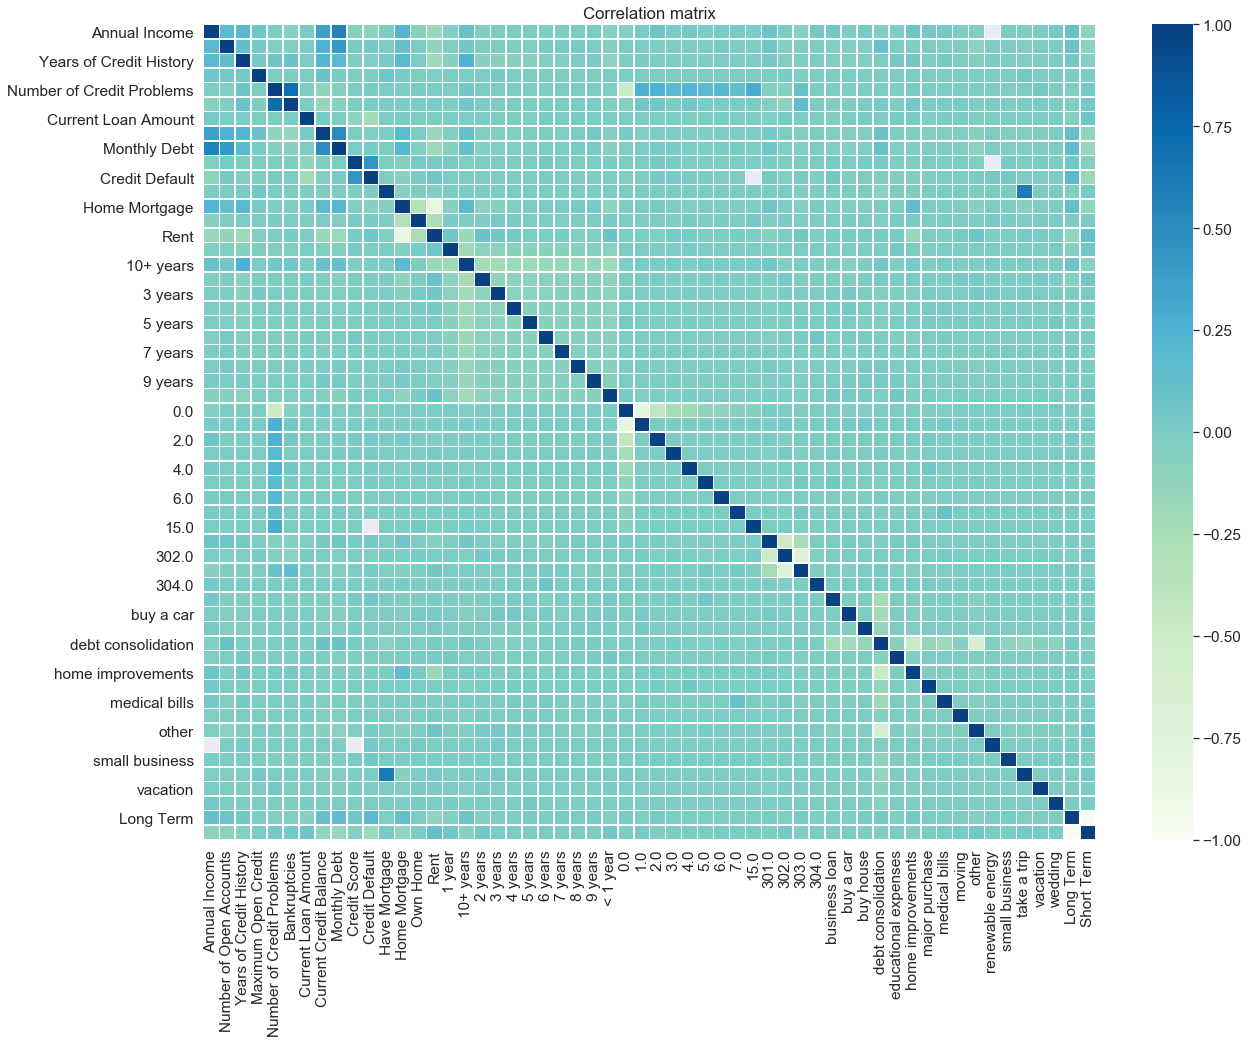

In [237]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=False, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

у меня не получилось построить свое разложение, и я воспользовался готовым FunkSVD, там правда метод принимает данные в специфичном виде. https://github.com/gbolmier/funk-svd

In [28]:
df_linear = pd.DataFrame(columns = ['u_id', 'i_id', 'rating'])

In [29]:
index = 0
for i in range(0, 10000):
    for j in range(0, 56):
        df_linear.loc[index] = [i, j, df.iloc[i,j]]
        index += 1
#         print(i, j, df.iloc[i, j])
#         if j > 3:
#             break
    if index%10000 == 0:
        print(index)

1400
2800
4200
5600
7000
8400
9800
11200
12600
14000
15400
16800
18200
19600
21000
22400
23800
25200
26600
28000
29400
30800
32200
33600
35000
36400
37800
39200
40600
42000
43400
44800
46200
47600
49000
50400
51800
53200
54600
56000
57400
58800
60200
61600
63000
64400
65800
67200
68600
70000
71400
72800
74200
75600
77000
78400
79800
81200
82600
84000
85400
86800
88200
89600
91000
92400
93800
95200
96600
98000
99400
100800
102200
103600
105000
106400
107800
109200
110600
112000
113400
114800
116200
117600
119000
120400
121800
123200
124600
126000
127400
128800
130200
131600
133000
134400
135800
137200
138600
140000
141400
142800
144200
145600
147000
148400
149800
151200
152600
154000
155400
156800
158200
159600
161000
162400
163800
165200
166600
168000
169400
170800
172200
173600
175000
176400
177800
179200
180600
182000
183400
184800
186200
187600
189000
190400
191800
193200
194600
196000
197400
198800
200200
201600
203000
204400
205800
207200
208600
210000
211400
212800
214200
215600


замечаем, что целевая переменная в колонке с индексом 10 (если начинаем с 0)

In [35]:
df_linear.to_csv('prep_dataset.csv', index=False, encoding='utf-8')

In [3]:
df_linear = pd.read_csv('prep_dataset.csv', sep=',', encoding='utf-8', decimal='.')

In [4]:
df = df_linear.dropna()

In [5]:
df['u_id'] = df['u_id'].astype('int64')
df['i_id'] = df['i_id'].astype('int64')

/Users/leonidkashin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/leonidkashin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
from funk_svd import SVD
from sklearn.metrics import mean_absolute_error

In [7]:
# После index tolist - лишний
train = df.sample(frac=0.8, random_state=7)
val = df.drop(train.index).sample(frac=0.5, random_state=8)
test = df.drop(train.index).drop(val.index)

In [8]:
svd = SVD(learning_rate=0.001, regularization=0.005, n_epochs=200,
          n_factors=50, min_rating=0.0000001, max_rating=1)

In [9]:
svd.fit(X=train, X_val=val, early_stopping=True, shuffle=False)

Preprocessing data...

Epoch 1/200  | val_loss: 0.06 - val_rmse: 0.24 - val_mae: 0.13 - took 0.7 sec
Epoch 2/200  | val_loss: 0.06 - val_rmse: 0.24 - val_mae: 0.13 - took 0.0 sec
Epoch 3/200  | val_loss: 0.05 - val_rmse: 0.23 - val_mae: 0.13 - took 0.0 sec
Epoch 4/200  | val_loss: 0.05 - val_rmse: 0.23 - val_mae: 0.13 - took 0.0 sec

Training took 1 sec


In [10]:
pred = svd.predict(test[['u_id', 'i_id']])

In [11]:
mae = mean_absolute_error(test["rating"], pred)

print('Test MAE: {:.4f}'.format(mae))

Test MAE: 0.1182



Делаем табличку для запроса предикта

In [13]:
tester = pd.DataFrame(columns = ['u_id', 'i_id'])

In [14]:
index = 0
for i in range(7500, 10000):
    tester.loc[index] = [i, 10]
    index += 1
#         print(i, j, df.iloc[i, j])
#         if j > 3:
#             break
    if index%100 == 0:
        print(index)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [15]:
pred_fine = svd.predict(tester[['u_id', 'i_id']])

In [16]:
pred_fine = pd.DataFrame(pred_fine)

In [17]:
pred_fine[0].loc[pred_fine[0] > 0.23] = 1

In [18]:
pred_fine[0].loc[pred_fine[0] < 0.24] = 0

In [19]:
pred_fine = pred_fine.astype(int)

In [20]:
pred_fine

,0
0,1
1,1
2,1
3,1
4,1
...,...
2495,0
2496,1
2497,1
2498,1


In [ ]:
pred_fine.to_csv('prep_dataset.csv', index=False, encoding='utf-8')